# Prueba Técnica - Cubro Design
### Technical Test - Cubro Design

## 1. Accesos

En caso de ejecutar en local

In [2]:
import os
import sys

In [3]:
# Taking the path of this .ipynb
os.getcwd()

'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio_Code\\Python\\Prueba_tecnica_Cubro\\src'

In [4]:
# Jumping to the previous folder
rooth_path = os.path.dirname(os.getcwd())
rooth_path

'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio_Code\\Python\\Prueba_tecnica_Cubro'

In [5]:
# Adding the previous folder to the sys.path so that anyone can run this script
sys.path.append(rooth_path)
sys.path = list(set(sys.path)) # To avoid duplicates in each run
sys.path

['',
 'C:\\Program Files\\Python38\\lib\\site-packages\\Pythonwin',
 'c:\\Users\\maria\\.vscode\\extensions\\ms-toolsai.jupyter-2021.5.745244803\\pythonFiles',
 'c:\\Users\\maria\\.vscode\\extensions\\ms-toolsai.jupyter-2021.5.745244803\\pythonFiles\\lib\\python',
 'C:\\Program Files\\Python38\\lib',
 'C:\\Program Files\\Python38',
 'C:\\Program Files\\Python38\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio_Code\\Python\\Prueba_tecnica_Cubro',
 'C:\\Program Files\\Python38\\python38.zip',
 'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio_Code\\Python\\Prueba_tecnica_Cubro\\src',
 'C:\\Program Files\\Python38\\lib\\site-packages',
 'C:\\Program Files\\Python38\\DLLs',
 'C:\\Users\\maria\\.ipython',
 'C:\\Program Files\\Python38\\lib\\site-packages\\IPython\\extensions',
 'C:\\Program Files\\Python38\\lib\\site-packages\\win32']

## 2. Librerías

In [6]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
pd.options.mode.chained_assignment = None  # To avoid default='warn'

from src.utils.mining_data_tb import changing_dates, split_column, check_dupli_nan
from src.utils.visualization_tb import histogram_figure, linediagram_figure, correlation_matrix, piechart_figure_6labels, checking_outliers_boxplot

## 3. Read csv

In [7]:
negocios = pd.read_csv("../data/hubspot-crm-exports-todos-los-negocios-2021-05-04.csv", sep=",", low_memory=False)
contactos = pd.read_csv("../data/todos-los-contactos.csv", sep=",", low_memory=False)

## 4. Entendiendo los datos

In [8]:
# Conociendo la el tamaño para ver como de grande es
print(negocios.shape)
print(contactos.shape)

(1738, 48)
(10052, 225)


In [9]:
# Para desplegar todas las columnas
pd.set_option('display.max_columns', None)

In [10]:
# Para ver el final del dataframe
negocios.tail()

,Deal ID,Received document,Closed Won Reason,Annual contract value,Last Modified Date,Pipeline,Motivo descarte,Next step,Campaign of last booking in meetings tool,Forecast Probability,Close Date,Deal Type,Status Template,Number of times contacted,Number of Sales Activities,Original Source Type,Forecast Amount,ID CUBRO,Medium of last booking in meetings tool,Create Date,Date of last meeting booked in meetings tool,Closed Lost Reason,Annual recurring revenue,Deal owner,Last Activity Date,Next Activity Date,Source of last booking in meetings tool,Owner Assigned Date,Deal Stage,Number of Contacts,Original Source Data 1,Total contract value,Model,Original Source Data 2,Last Contacted,HubSpot Team,Deal Name,Amount,Monthly recurring revenue,Template,Market,Deal Description,Forecast category,Amount in company currency,Associated Company ID,Associated Company,Associated Contact IDs,Associated Contacts
1733,1124127273,NaN,NaN,NaN,2021-03-22 04:03,Sales Pipeline,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,3.0,NaN,3014.0,NaN,NaN,2019-10-28 10:05,NaN,NaN,NaN,Equipo CUBRO,2020-03-19 12:45,NaN,NaN,2019-10-28 10:05,Quote sent (#3),0.0,NaN,NaN,NaN,NaN,2020-03-19 12:45,NaN,1227B Elena Gª Agüero,3014.0,NaN,NaN,ES,NaN,Pipeline,3014.0,NaN,NaN,NaN,NaN
1734,1119843067,NaN,NaN,NaN,2021-03-21 16:03,Sales Pipeline,NaN,NaN,NaN,0.0,NaN,NaN,NaN,31.0,56.0,Offline Sources,0.0,NaN,NaN,2018-09-20 13:27,NaN,NaN,NaN,Equipo CUBRO,2020-10-13 13:36,NaN,NaN,2019-10-25 13:27,Discarded Deal (DP),1.0,CONTACTS,NaN,NaN,CRM_UI,2020-08-24 13:52,NaN,1028C - Gilad lan,1577.0,NaN,NaN,ES,NaN,Not forecasted,1577.0,NaN,NaN,1588151.0,Gilad Lan
1735,1119836206,NaN,NaN,NaN,2021-03-22 07:12,Sales Pipeline,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2019-08-14 13:22,NaN,NaN,NaN,Equipo CUBRO,NaN,NaN,NaN,2019-10-25 13:22,Discarded Deal (DP),0.0,NaN,NaN,NaN,NaN,NaN,NaN,1026C - Ryan Stanley,2899.0,NaN,NaN,ES,NaN,Not forecasted,2899.0,NaN,NaN,NaN,NaN
1736,1119523243,NaN,NaN,NaN,2021-03-20 04:30,Sales Pipeline,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Offline Sources,1786.0,NaN,NaN,2018-07-26 13:14,NaN,NaN,NaN,Equipo CUBRO,NaN,NaN,NaN,2019-10-25 13:14,Quote sent (#3),1.0,CONTACTS,NaN,NaN,CRM_UI,NaN,NaN,1022C - Sara Garcia,1786.0,NaN,NaN,ES,NaN,Pipeline,1786.0,NaN,NaN,672151.0,Sara Garcia
1737,1119522175,NaN,NaN,NaN,2021-03-23 00:21,Sales Pipeline,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2019-10-23 12:54,NaN,NaN,NaN,Equipo CUBRO,NaN,NaN,NaN,2019-10-25 12:54,Discarded Deal (DP),0.0,NaN,NaN,NaN,NaN,NaN,NaN,1217C - Marcela Gonzalez,6897.0,NaN,NaN,ES,NaN,Not forecasted,6897.0,NaN,NaN,NaN,NaN


In [11]:
negocios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Deal ID                                       1738 non-null   int64  
 1   Received document                             466 non-null    object 
 2   Closed Won Reason                             78 non-null     object 
 3   Annual contract value                         0 non-null      float64
 4   Last Modified Date                            1738 non-null   object 
 5   Pipeline                                      1738 non-null   object 
 6   Motivo descarte                               109 non-null    object 
 7   Next step                                     0 non-null      float64
 8   Campaign of last booking in meetings tool     0 non-null      float64
 9   Forecast Probability                          1485 non-null   f

In [12]:
# Viendo cuantas opciones tiene Deal Stage
negocios["Deal Stage"].unique()

array(['Closed deal (#5)', 'Discarded Deal (DP)', 'Quote sent (#3)',
       'Hot deal (#4)'], dtype=object)

In [13]:
#Me quedo con estas columnas
negocios_sub = negocios[["Deal Stage", "Received document", "Closed Won Reason", "Last Modified Date", "Motivo descarte",  "Close Date", "Original Source Type", "Forecast Amount", "Create Date", "Deal owner", "Amount"]]

In [14]:
negocios_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Deal Stage            1738 non-null   object 
 1   Received document     466 non-null    object 
 2   Closed Won Reason     78 non-null     object 
 3   Last Modified Date    1738 non-null   object 
 4   Motivo descarte       109 non-null    object 
 5   Close Date            1279 non-null   object 
 6   Original Source Type  1272 non-null   object 
 7   Forecast Amount       1601 non-null   float64
 8   Create Date           1738 non-null   object 
 9   Deal owner            1732 non-null   object 
 10  Amount                1601 non-null   float64
dtypes: float64(2), object(9)
memory usage: 149.5+ KB


In [15]:
# Veo como es el dataframe de contactos
contactos

,Contact ID,First Name,Last Name,¿Necesitas una reforma integral?,Producto,Time registration email was sent,Modalidad de servicio,Last marketing email name,Status,Registered At,Marketing emails opened,Lead Status,Total Revenue,Gender,Postal Code,¿Ya tienes un proyecto de la cocina?,Product of Interest,Last Aircall call timestamp,¿Qué electrodomésticos instalarás?,Email hard bounce reason,Marketing emails replied,Marketing contact until next update,Scrapping,Klout Score,Gender.1,IP City,MERCADO,Company size,¿Qué distribución tendrá tu nueva cocina?,Invalid email address,Phone number-,Email address automated quarantine reason,Last Touch Converting Campaign,First Touch Converting Campaign,Recent Deal Close Date,Number of Pageviews,Legal basis for processing contact's data,Became a Marketing Qualified Lead Date,Google ad click id,Military status,¿Querrás ocultar tu nevera con nuestros paneles?,Campaign of last booking in meetings tool,Buying Role,GIMIMO METAI,Email,Time of Last Session,Time of First Session,Muestras,City,Close Date,Field of study,Kitchen shape,Message,Opted out of email: One to One,Associated Deals,Opted out of email: Marketing Information,Recent Deal Amount,Detalles Proyecto,Gender.2,Number of times contacted,Number of Sales Activities,First Conversion Date,Date of birth,¿Qué tamaño de mueble necesitas?,Recent Sales Email Clicked Date,Recent Sales Email Opened Date,Petición review,Original Source,First marketing email reply date,Last used Aircall tags,First Deal Created Date,Number of Form Submissions,correco electrónico,Currently in workflow,Medium of last booking in meetings tool,Contact unworked,Last used Aircall phone number,Create Date,¿Qué tamaño tiene tu cocina? (en m lineales de encimera),Anno di nascita,Reviews Houzz,LinkedIn Bio,First Conversion,¿Necesitas una reforma integral para tu vivienda?,Became a Sales Qualified Lead Date,Date of last meeting booked in meetings tool,First marketing email click date,City.1,Start date,Phone number--,Whatsapp Fase 1,Preferred language,Call details info,Mobile Phone Number,Number of event completions,¿Cuándo piensas reformar la cocina?,Degree,Average Pageviews,Marketing emails delivered,Number of Unique Forms Submitted,Tareas hunter,Email Confirmed,Last Modified Date,Number of Sessions,Work email,IP Country Code,Phone Number,Presupuesto estimado,Avez-vous déjà un projet de cuisine?,Became a Subscriber Date,Last Engagement Date,Etá,Phone number,Phone number---,Potencial,Marketing email confirmation status,Contact owner,Event Revenue,Tipo cliente,Last Activity Date,Next Activity Date,Temperatura,Source of last booking in meetings tool,Owner Assigned Date,Catalogue presentation,State/Region,Last Aircall call outcome,Became an Opportunity Date,Marketing emails clicked,¿Qué tamaño de tablero necesitas?,City.2,Follower Count,Last marketing email open date,Unsubscribed from all email,Membership Notes,Last Page Seen,First Page Seen,Email.1,Original Source Drill-Down 1,Last marketing email send date,¿Ya tienes un proyecto de cocina?,IP State Code/Region Code,Recent Conversion Date,Presupuesto,Became an Other Lifecycle Date,Original Source Drill-Down 2,Lifecycle Stage,Quand voudriez-vous installer votre cuisine?,School,Last Contacted,Full name,Street Address,español,Recent Conversion,HubSpot Team,Twitter Bio,Last marketing email reply date,TENISO KLUBAS / TRENERIS,Full name.1,Acabados y colores,Last contact date,Country/Region,Email address quarantine reason,LinkedIn Connections,Facebook click id,Last marketing email click date,Persona,Salutation,Sends Since Last Engagement,Became a Customer Date,Eres un cliente profesional o particular,Full name.2,TENNISKLUBB,Currently in Sequence,IP State/Region,¿Qué tamaño de armario necesitas?,Full name-,Relationship Status,Post code,Time Last Seen,Time First Seen,Tennis club,Disponibilidad Asesoramiento,Job function,Became a Lead Date,Dirección postal,Recent Sales Email Replied Date,Source,FÖDELSEÅR,Website URL,Job Title,Email Domain,HubS

In [16]:
# El dataframe es tan grande que no deja ver la información de nulos
contactos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Columns: 225 entries, Contact ID to Associated Company
dtypes: bool(1), float64(103), int64(1), object(120)
memory usage: 17.2+ MB


In [17]:
contactos["Tipo cliente"].unique()

array([nan, 'Particular: propietario, inquilino',
       'Profesional: arquitecto, interiorista'], dtype=object)

In [16]:
contactos["¿Ya tienes un proyecto de cocina?"].unique()

array([nan, 'No, pero ya sé lo que quiero',
       'Tengo planos de un profesional', 'Tengo un Planner de IKEA',
       'Non, pas encore', 'Non, mais je sais ce que je veux',
       'Todavía no', 'Oui, un planner IKEA', 'Oui, des plans détaillés',
       'si', 'no'], dtype=object)

In [17]:
# Selecciono estas columnas
contactos_sub = contactos[["Producto", "Total Revenue", "IP City", "MERCADO", "Original Source", "Recent Deal Close Date", "Close Date", "Recent Deal Amount", "Create Date", "¿Cuándo piensas reformar la cocina?", "Tipo cliente", "¿Ya tienes un proyecto de cocina?", ]]

In [18]:
contactos_sub.shape

(10052, 12)

In [19]:
contactos_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Producto                             820 non-null    object 
 1   Total Revenue                        224 non-null    float64
 2   IP City                              1641 non-null   object 
 3   MERCADO                              9938 non-null   object 
 4   Original Source                      10052 non-null  object 
 5   Recent Deal Close Date               233 non-null    object 
 6   Close Date                           236 non-null    object 
 7   Recent Deal Amount                   222 non-null    float64
 8   Create Date                          10052 non-null  object 
 9   ¿Cuándo piensas reformar la cocina?  5030 non-null   object 
 10  Tipo cliente                         6606 non-null   object 
 11  ¿Ya tienes un proyecto de co

In [20]:
contactos_sub.head()

,Producto,Total Revenue,IP City,MERCADO,Original Source,Recent Deal Close Date,Close Date,Recent Deal Amount,Create Date,¿Cuándo piensas reformar la cocina?,Tipo cliente,¿Ya tienes un proyecto de cocina?
0,NaN,NaN,NaN,NaN,Paid Social,NaN,NaN,NaN,2021-05-04 18:48,en_2/3_meses,NaN,NaN
1,NaN,NaN,NaN,NaN,Paid Social,NaN,NaN,NaN,2021-05-04 18:37,NaN,NaN,NaN
2,NaN,NaN,ashburn,NaN,Paid Search,NaN,NaN,NaN,2021-05-04 18:16,Dentro de 6 meses,NaN,NaN
3,NaN,NaN,paris,NaN,Offline Sources,NaN,NaN,NaN,2021-05-04 18:14,NaN,NaN,NaN
4,NaN,NaN,ashburn,ES,Paid Search,NaN,NaN,NaN,2021-05-04 17:30,Lo antes posible,"Particular: propietario, inquilino",NaN


In [21]:
negocios_sub.head()

,Deal Stage,Received document,Closed Won Reason,Last Modified Date,Motivo descarte,Close Date,Original Source Type,Forecast Amount,Create Date,Deal owner,Amount
0,Closed deal (#5),Design plan,NaN,2021-05-04 11:54,NaN,2021-05-04 11:53,Offline Sources,65547.0,2021-02-03 11:53,Cristina Caeiro Barreiro,65547.0
1,Closed deal (#5),IKEA planner,Pago anticipado 50%,2021-05-04 11:01,NaN,2021-05-04 11:01,Paid Search,1600.0,2021-04-09 15:32,ALEXANDRE LIZARBE,1600.0
2,Discarded Deal (DP),IKEA planner,NaN,2021-05-04 09:56,Servicio: prefiere la gestión de una tienda,2021-05-04 09:56,Offline Sources,9336.0,2021-02-25 14:19,Beatriz Lorda,9336.0
3,Quote sent (#3),Design plan,NaN,2021-04-20 17:27,NaN,2021-04-30 17:26,Offline Sources,7392.0,2021-04-20 17:26,Alicia Lechuga Amaro,7392.0
4,Quote sent (#3),IKEA planner,NaN,2021-04-20 17:21,NaN,2021-04-30 17:20,Organic Search,5428.0,2021-04-20 17:20,Alicia Lechuga Amaro,5428.0


## 5. Data visualizations

In [22]:
profile_negocios = ProfileReport(negocios_sub, explorative=True)
profile_negocios

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


In [23]:
# Recuerdo como es el dataframe de negocios
negocios_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Deal Stage            1738 non-null   object 
 1   Received document     466 non-null    object 
 2   Closed Won Reason     78 non-null     object 
 3   Last Modified Date    1738 non-null   object 
 4   Motivo descarte       109 non-null    object 
 5   Close Date            1279 non-null   object 
 6   Original Source Type  1272 non-null   object 
 7   Forecast Amount       1601 non-null   float64
 8   Create Date           1738 non-null   object 
 9   Deal owner            1732 non-null   object 
 10  Amount                1601 non-null   float64
dtypes: float64(2), object(9)
memory usage: 149.5+ KB


In [24]:
# Cambio el formato de Close Date a datetime
changing_dates(df=negocios_sub, name_column="Close Date")

In [25]:
# Cambio el formato de Create Date a datetime
changing_dates(df=negocios_sub, name_column="Create Date")

In [26]:
# Compruebo que el cambio se ha hecho correctamente
negocios_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Deal Stage            1738 non-null   object        
 1   Received document     466 non-null    object        
 2   Closed Won Reason     78 non-null     object        
 3   Last Modified Date    1738 non-null   object        
 4   Motivo descarte       109 non-null    object        
 5   Close Date            1279 non-null   datetime64[ns]
 6   Original Source Type  1272 non-null   object        
 7   Forecast Amount       1601 non-null   float64       
 8   Create Date           1738 non-null   datetime64[ns]
 9   Deal owner            1732 non-null   object        
 10  Amount                1601 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 149.5+ KB


In [27]:
negocios_sub.head()

,Deal Stage,Received document,Closed Won Reason,Last Modified Date,Motivo descarte,Close Date,Original Source Type,Forecast Amount,Create Date,Deal owner,Amount
0,Closed deal (#5),Design plan,NaN,2021-05-04 11:54,NaN,2021-05-04 11:53:00,Offline Sources,65547.0,2021-02-03 11:53:00,Cristina Caeiro Barreiro,65547.0
1,Closed deal (#5),IKEA planner,Pago anticipado 50%,2021-05-04 11:01,NaN,2021-05-04 11:01:00,Paid Search,1600.0,2021-04-09 15:32:00,ALEXANDRE LIZARBE,1600.0
2,Discarded Deal (DP),IKEA planner,NaN,2021-05-04 09:56,Servicio: prefiere la gestión de una tienda,2021-05-04 09:56:00,Offline Sources,9336.0,2021-02-25 14:19:00,Beatriz Lorda,9336.0
3,Quote sent (#3),Design plan,NaN,2021-04-20 17:27,NaN,2021-04-30 17:26:00,Offline Sources,7392.0,2021-04-20 17:26:00,Alicia Lechuga Amaro,7392.0
4,Quote sent (#3),IKEA planner,NaN,2021-04-20 17:21,NaN,2021-04-30 17:20:00,Organic Search,5428.0,2021-04-20 17:20:00,Alicia Lechuga Amaro,5428.0


In [28]:
# Me creo las columnas de Month_closed y Month_open
negocios_sub["Month_closed"] = negocios_sub['Close Date'].dt.month
negocios_sub["Month_open"] = negocios_sub['Create Date'].dt.month

In [29]:
negocios_sub.head()

,Deal Stage,Received document,Closed Won Reason,Last Modified Date,Motivo descarte,Close Date,Original Source Type,Forecast Amount,Create Date,Deal owner,Amount,Month_closed,Month_open
0,Closed deal (#5),Design plan,NaN,2021-05-04 11:54,NaN,2021-05-04 11:53:00,Offline Sources,65547.0,2021-02-03 11:53:00,Cristina Caeiro Barreiro,65547.0,5.0,2
1,Closed deal (#5),IKEA planner,Pago anticipado 50%,2021-05-04 11:01,NaN,2021-05-04 11:01:00,Paid Search,1600.0,2021-04-09 15:32:00,ALEXANDRE LIZARBE,1600.0,5.0,4
2,Discarded Deal (DP),IKEA planner,NaN,2021-05-04 09:56,Servicio: prefiere la gestión de una tienda,2021-05-04 09:56:00,Offline Sources,9336.0,2021-02-25 14:19:00,Beatriz Lorda,9336.0,5.0,2
3,Quote sent (#3),Design plan,NaN,2021-04-20 17:27,NaN,2021-04-30 17:26:00,Offline Sources,7392.0,2021-04-20 17:26:00,Alicia Lechuga Amaro,7392.0,4.0,4
4,Quote sent (#3),IKEA planner,NaN,2021-04-20 17:21,NaN,2021-04-30 17:20:00,Organic Search,5428.0,2021-04-20 17:20:00,Alicia Lechuga Amaro,5428.0,4.0,4


## ¿Cuándo entran más contactos?

In [30]:
contactos_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Producto                             820 non-null    object 
 1   Total Revenue                        224 non-null    float64
 2   IP City                              1641 non-null   object 
 3   MERCADO                              9938 non-null   object 
 4   Original Source                      10052 non-null  object 
 5   Recent Deal Close Date               233 non-null    object 
 6   Close Date                           236 non-null    object 
 7   Recent Deal Amount                   222 non-null    float64
 8   Create Date                          10052 non-null  object 
 9   ¿Cuándo piensas reformar la cocina?  5030 non-null   object 
 10  Tipo cliente                         6606 non-null   object 
 11  ¿Ya tienes un proyecto de co

In [31]:
changing_dates(df=contactos_sub, name_column="Create Date")

In [32]:
contactos_sub["Month_open"] = contactos_sub['Create Date'].dt.month

In [33]:
groupby_contc_open = contactos_sub['Month_open'].value_counts().sort_index()
groupby_contc_open

1     1438
2     1360
3     1225
4     1457
5      231
6       32
7       35
8      274
9      240
10    1147
11    1481
12    1132
Name: Month_open, dtype: int64

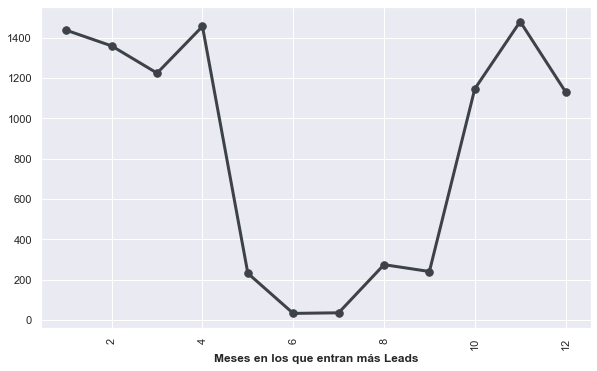

In [34]:
x = groupby_contc_open.index
y = groupby_contc_open.values

linediagram_figure(x = x, y = y, x_label="Meses en los que entran más Leads", y_label=None, rooth_path=rooth_path, name_fig="\\meses_entran_todos_contactos.png")

## ¿De dónde son todos los contactos que llegan?

In [35]:
contactos_sub.head()

,Producto,Total Revenue,IP City,MERCADO,Original Source,Recent Deal Close Date,Close Date,Recent Deal Amount,Create Date,¿Cuándo piensas reformar la cocina?,Tipo cliente,¿Ya tienes un proyecto de cocina?,Month_open
0,NaN,NaN,NaN,NaN,Paid Social,NaN,NaN,NaN,2021-05-04 18:48:00,en_2/3_meses,NaN,NaN,5
1,NaN,NaN,NaN,NaN,Paid Social,NaN,NaN,NaN,2021-05-04 18:37:00,NaN,NaN,NaN,5
2,NaN,NaN,ashburn,NaN,Paid Search,NaN,NaN,NaN,2021-05-04 18:16:00,Dentro de 6 meses,NaN,NaN,5
3,NaN,NaN,paris,NaN,Offline Sources,NaN,NaN,NaN,2021-05-04 18:14:00,NaN,NaN,NaN,5
4,NaN,NaN,ashburn,ES,Paid Search,NaN,NaN,NaN,2021-05-04 17:30:00,Lo antes posible,"Particular: propietario, inquilino",NaN,5


In [36]:
# Cuento las opciones que hay
groupby_MERCADO = contactos_sub['MERCADO'].value_counts()
groupby_MERCADO

ES        5505
FR        4409
Others      19
DE           5
Name: MERCADO, dtype: int64

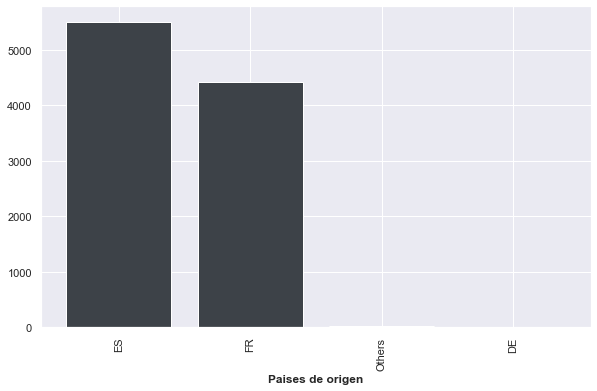

In [37]:
x = groupby_MERCADO.index
y = groupby_MERCADO.values

histogram_figure(x, y, x_label = "Paises de origen" , y_label = None, rooth_path = rooth_path, name_fig = "\\paises_de_origen.png")

## ¿Cuándo piensan reformar su cocina?

In [38]:
contactos_sub.head()

,Producto,Total Revenue,IP City,MERCADO,Original Source,Recent Deal Close Date,Close Date,Recent Deal Amount,Create Date,¿Cuándo piensas reformar la cocina?,Tipo cliente,¿Ya tienes un proyecto de cocina?,Month_open
0,NaN,NaN,NaN,NaN,Paid Social,NaN,NaN,NaN,2021-05-04 18:48:00,en_2/3_meses,NaN,NaN,5
1,NaN,NaN,NaN,NaN,Paid Social,NaN,NaN,NaN,2021-05-04 18:37:00,NaN,NaN,NaN,5
2,NaN,NaN,ashburn,NaN,Paid Search,NaN,NaN,NaN,2021-05-04 18:16:00,Dentro de 6 meses,NaN,NaN,5
3,NaN,NaN,paris,NaN,Offline Sources,NaN,NaN,NaN,2021-05-04 18:14:00,NaN,NaN,NaN,5
4,NaN,NaN,ashburn,ES,Paid Search,NaN,NaN,NaN,2021-05-04 17:30:00,Lo antes posible,"Particular: propietario, inquilino",NaN,5


In [39]:
# Cuento cuantas veces se repite cada opción
    # Vemos 5 opciones principales y luego otras opciones escritas a mano
groupby_tiempo_cocina = contactos_sub['¿Cuándo piensas reformar la cocina?'].value_counts()
groupby_tiempo_cocina

en_2/3_meses          1183
más_adelante          1152
próximo_mes           1034
Lo antes posible       356
Más adelante           247
                      ... 
No lo sé                 1
En 6 mes 3               1
En 6 meseS               1
En Navidades             1
en un par de meses       1
Name: ¿Cuándo piensas reformar la cocina?, Length: 175, dtype: int64

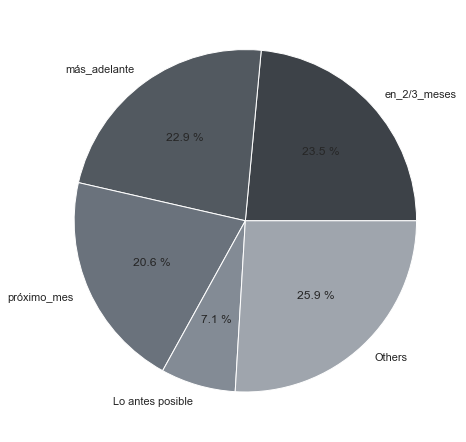

In [40]:
x1 = groupby_tiempo_cocina[0]
x2 = groupby_tiempo_cocina[1]
x3 = groupby_tiempo_cocina[2]
x4 = groupby_tiempo_cocina[3]
x5 = contactos_sub['¿Cuándo piensas reformar la cocina?'].count() - groupby_tiempo_cocina[0] - groupby_tiempo_cocina[1] - groupby_tiempo_cocina[2] - groupby_tiempo_cocina[3]

label_name = groupby_tiempo_cocina.index

labels = [label_name[0], label_name[1], label_name[2], label_name[3], "Others"]

piechart_figure_6labels(x1 = x1, x2 = x2, x3 = x3, x4 = x4, x5 = x5, labels = labels, rooth_path = rooth_path, name_fig="\\tiempo_cocina.png")

## ¿De qué plataforma llegan los contactos en general?

In [41]:
contactos_sub.head()

,Producto,Total Revenue,IP City,MERCADO,Original Source,Recent Deal Close Date,Close Date,Recent Deal Amount,Create Date,¿Cuándo piensas reformar la cocina?,Tipo cliente,¿Ya tienes un proyecto de cocina?,Month_open
0,NaN,NaN,NaN,NaN,Paid Social,NaN,NaN,NaN,2021-05-04 18:48:00,en_2/3_meses,NaN,NaN,5
1,NaN,NaN,NaN,NaN,Paid Social,NaN,NaN,NaN,2021-05-04 18:37:00,NaN,NaN,NaN,5
2,NaN,NaN,ashburn,NaN,Paid Search,NaN,NaN,NaN,2021-05-04 18:16:00,Dentro de 6 meses,NaN,NaN,5
3,NaN,NaN,paris,NaN,Offline Sources,NaN,NaN,NaN,2021-05-04 18:14:00,NaN,NaN,NaN,5
4,NaN,NaN,ashburn,ES,Paid Search,NaN,NaN,NaN,2021-05-04 17:30:00,Lo antes posible,"Particular: propietario, inquilino",NaN,5


In [42]:
# Cuento cuantas veces se repite cada plataforma
groupby_source_from_all = contactos_sub['Original Source'].value_counts()
groupby_source_from_all

Paid Social        7601
Offline Sources    1196
Paid Search         891
Direct Traffic      253
Organic Search       79
Organic Social       15
Referrals            14
Other Campaigns       3
Name: Original Source, dtype: int64

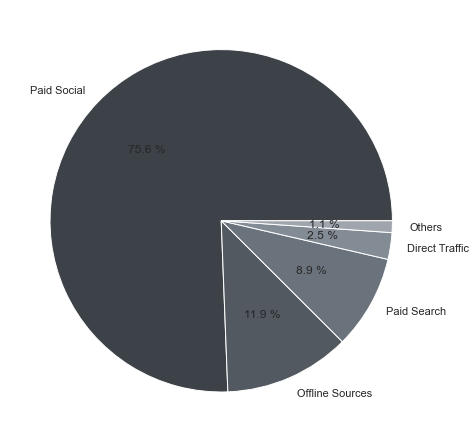

In [43]:
x1 = groupby_source_from_all[0]
x2 = groupby_source_from_all[1]
x3 = groupby_source_from_all[2]
x4 = groupby_source_from_all[3]
x5 = groupby_source_from_all[4] + groupby_source_from_all[5] + groupby_source_from_all[6] + groupby_source_from_all[7]

label_name = groupby_source_from_all.index

labels = [label_name[0], label_name[1], label_name[2], label_name[3], "Others"]

piechart_figure_6labels(x1 = x1, x2 = x2, x3 = x3, x4 = x4, x5 = x5, labels = labels, rooth_path = rooth_path, name_fig="\\origen_conversion_TODAS_fases.png")

## Los que llegan a la fase 5, ¿cuándo suelen entrar en el sistema?

In [44]:
# Me quedo solo con negocios ya cerrados
negocios5 = negocios_sub.loc[(negocios_sub["Deal Stage"] == "Closed deal (#5)")]
negocios5

,Deal Stage,Received document,Closed Won Reason,Last Modified Date,Motivo descarte,Close Date,Original Source Type,Forecast Amount,Create Date,Deal owner,Amount,Month_closed,Month_open
0,Closed deal (#5),Design plan,NaN,2021-05-04 11:54,NaN,2021-05-04 11:53:00,Offline Sources,65547.0,2021-02-03 11:53:00,Cristina Caeiro Barreiro,65547.0,5.0,2
1,Closed deal (#5),IKEA planner,Pago anticipado 50%,2021-05-04 11:01,NaN,2021-05-04 11:01:00,Paid Search,1600.0,2021-04-09 15:32:00,ALEXANDRE LIZARBE,1600.0,5.0,4
9,Closed deal (#5),Design plan,NaN,2021-04-30 17:20,NaN,2021-04-29 17:19:00,Offline Sources,7400.0,2021-03-26 10:34:00,Alicia Lechuga Amaro,7400.0,4.0,3
10,Closed deal (#5),Design plan,10069,2021-04-29 12:24,NaN,2021-04-29 12:24:00,Offline Sources,49452.0,2021-02-08 14:34:00,Cristina Caeiro Barreiro,49452.0,4.0,2
12,Closed deal (#5),Design plan,NaN,2021-04-30 17:15,NaN,2021-04-28 17:15:00,Offline Sources,14500.0,2021-04-30 17:14:00,Alicia Lechuga Amaro,14500.0,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,Closed deal (#5),Design plan,NaN,2021-04-30 17:18,NaN,NaT,Offline Sources,9047.0,2021-04-30 17:17:00,Alicia Lechuga Amaro,9047.0,NaN,4
1671,Closed deal (#5),NaN,NaN,2021-03-21 23:13,NaN,NaT,Offline Sources,5306.0,2019-12-11 17:04:00,Alessia Schoor,5306.0,NaN,12
1681,Closed deal (#5),NaN,NaN,2021-03-22 08:55,NaN,NaT,Offline Sources,2943.0,2020-06-07 15:58:00,Jorge Cienfuegos,2943.0,NaN,6
1725,Closed deal (#5),NaN,NaN,2021-04-17 12:56,NaN,NaT,Paid Social,3547.0,2019-11-29 16:41:00,Paula Curras Garcia (Deactivated User),3547.0,NaN,11


In [45]:
# Cuento cuantas veces se repiten los meses
groupby_open5 = negocios5['Month_open'].value_counts().sort_index()
groupby_open5

1     27
2     31
3     24
4     15
5     25
6     19
7     15
8     10
9     19
10    66
11    39
12    19
Name: Month_open, dtype: int64

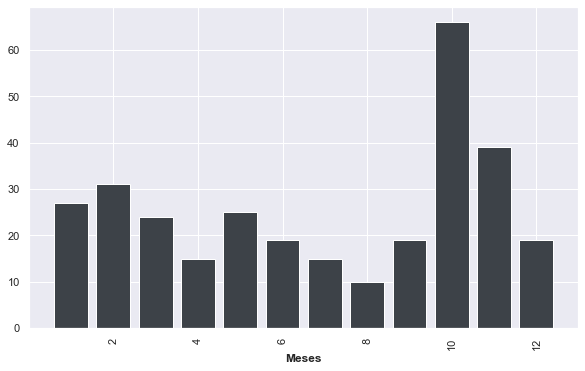

In [46]:
x = groupby_open5.index
y = groupby_open5.values

histogram_figure(x = x, y=y, rooth_path = rooth_path, x_label = "Meses", y_label= None, name_fig = "\\Mes_entrar_sistema_fase5.png" )

## ¿Cuántos meses tardan de media de inicio a cierre de negocio?

In [47]:
negocios5.head()

,Deal Stage,Received document,Closed Won Reason,Last Modified Date,Motivo descarte,Close Date,Original Source Type,Forecast Amount,Create Date,Deal owner,Amount,Month_closed,Month_open
0,Closed deal (#5),Design plan,NaN,2021-05-04 11:54,NaN,2021-05-04 11:53:00,Offline Sources,65547.0,2021-02-03 11:53:00,Cristina Caeiro Barreiro,65547.0,5.0,2
1,Closed deal (#5),IKEA planner,Pago anticipado 50%,2021-05-04 11:01,NaN,2021-05-04 11:01:00,Paid Search,1600.0,2021-04-09 15:32:00,ALEXANDRE LIZARBE,1600.0,5.0,4
9,Closed deal (#5),Design plan,NaN,2021-04-30 17:20,NaN,2021-04-29 17:19:00,Offline Sources,7400.0,2021-03-26 10:34:00,Alicia Lechuga Amaro,7400.0,4.0,3
10,Closed deal (#5),Design plan,10069,2021-04-29 12:24,NaN,2021-04-29 12:24:00,Offline Sources,49452.0,2021-02-08 14:34:00,Cristina Caeiro Barreiro,49452.0,4.0,2
12,Closed deal (#5),Design plan,NaN,2021-04-30 17:15,NaN,2021-04-28 17:15:00,Offline Sources,14500.0,2021-04-30 17:14:00,Alicia Lechuga Amaro,14500.0,4.0,4


In [48]:
# Me quedo solo con los meses en los que Close Date no tiene nulos
negocios5_na_closedate = negocios5[negocios5['Close Date'].notna()]

In [49]:
# Resto a los meses que hay desde la fecha de cierre hasta la fecha de inicio
negocios5_na_closedate['meses_inicio_a_cierre'] = ((negocios5_na_closedate["Close Date"] - negocios5_na_closedate["Create Date"])/np.timedelta64(1, 'M'))
negocios5_na_closedate['meses_inicio_a_cierre'] = negocios5_na_closedate['meses_inicio_a_cierre'].astype(int)

In [50]:
# Hay resultados que me dan negativo, por tanto, la fecha de cierre es errónea
    # Me quedo solo con los meses en positivo para hacer el análisis
negocios5_na_closedate = negocios5_na_closedate.loc[(negocios5_na_closedate["meses_inicio_a_cierre"] >= 0)]
negocios5_na_closedate

,Deal Stage,Received document,Closed Won Reason,Last Modified Date,Motivo descarte,Close Date,Original Source Type,Forecast Amount,Create Date,Deal owner,Amount,Month_closed,Month_open,meses_inicio_a_cierre
0,Closed deal (#5),Design plan,NaN,2021-05-04 11:54,NaN,2021-05-04 11:53:00,Offline Sources,65547.0,2021-02-03 11:53:00,Cristina Caeiro Barreiro,65547.0,5.0,2,2
1,Closed deal (#5),IKEA planner,Pago anticipado 50%,2021-05-04 11:01,NaN,2021-05-04 11:01:00,Paid Search,1600.0,2021-04-09 15:32:00,ALEXANDRE LIZARBE,1600.0,5.0,4,0
9,Closed deal (#5),Design plan,NaN,2021-04-30 17:20,NaN,2021-04-29 17:19:00,Offline Sources,7400.0,2021-03-26 10:34:00,Alicia Lechuga Amaro,7400.0,4.0,3,1
10,Closed deal (#5),Design plan,10069,2021-04-29 12:24,NaN,2021-04-29 12:24:00,Offline Sources,49452.0,2021-02-08 14:34:00,Cristina Caeiro Barreiro,49452.0,4.0,2,2
12,Closed deal (#5),Design plan,NaN,2021-04-30 17:15,NaN,2021-04-28 17:15:00,Offline Sources,14500.0,2021-04-30 17:14:00,Alicia Lechuga Amaro,14500.0,4.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Closed deal (#5),NaN,NaN,2021-03-20 00:38,NaN,2019-10-23 11:52:00,Offline Sources,875.0,2019-10-15 11:52:00,Equipo CUBRO,875.0,10.0,10,0
1195,Closed deal (#5),NaN,NaN,2021-03-20 04:18,NaN,2019-10-22 09:54:00,Offline Sources,2516.0,2019-10-22 09:52:00,Equipo CUBRO,2516.0,10.0,10,0
1198,Closed deal (#5),NaN,NaN,2021-03-21 19:16,NaN,2019-10-21 14:21:00,Offline Sources,2162.0,2019-10-21 14:20:00,Jaime Pont,2162.0,10.0,10,0
1201,Closed deal (#5),NaN,NaN,2021-03-22 04:22,NaN,2019-09-30 09:19:00,Offline Sources,4199.0,2019-10-23 09:19:00,Equipo CUBRO,4199.0,9.0,10,0


In [51]:
# Cuento cuantas veces se repiten esos periodos
groupby_meses_inicio_cierre = negocios5_na_closedate['meses_inicio_a_cierre'].value_counts().sort_index()
groupby_meses_inicio_cierre

0     106
1      60
2      37
3      26
4      14
5      13
6       6
7       5
8       1
9       2
10      1
13      1
15      1
Name: meses_inicio_a_cierre, dtype: int64

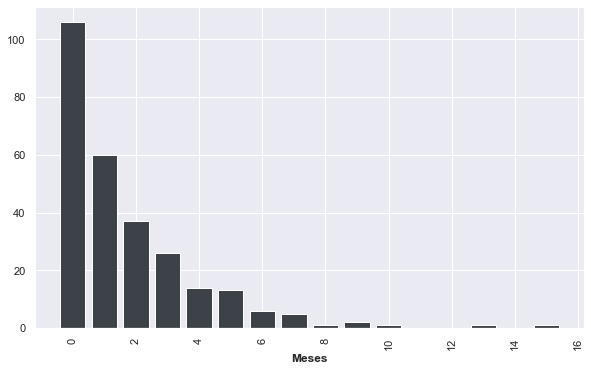

In [52]:
x = groupby_meses_inicio_cierre.index
y = groupby_meses_inicio_cierre.values

histogram_figure(x = x, y=y, rooth_path = rooth_path, x_label = "Meses", y_label= None, name_fig = "\\Meses_de_inicio_a_cierre.png" )

## ¿Desde dónde suelen venir los que cierran presupuesto?

In [53]:
negocios5.head()

,Deal Stage,Received document,Closed Won Reason,Last Modified Date,Motivo descarte,Close Date,Original Source Type,Forecast Amount,Create Date,Deal owner,Amount,Month_closed,Month_open
0,Closed deal (#5),Design plan,NaN,2021-05-04 11:54,NaN,2021-05-04 11:53:00,Offline Sources,65547.0,2021-02-03 11:53:00,Cristina Caeiro Barreiro,65547.0,5.0,2
1,Closed deal (#5),IKEA planner,Pago anticipado 50%,2021-05-04 11:01,NaN,2021-05-04 11:01:00,Paid Search,1600.0,2021-04-09 15:32:00,ALEXANDRE LIZARBE,1600.0,5.0,4
9,Closed deal (#5),Design plan,NaN,2021-04-30 17:20,NaN,2021-04-29 17:19:00,Offline Sources,7400.0,2021-03-26 10:34:00,Alicia Lechuga Amaro,7400.0,4.0,3
10,Closed deal (#5),Design plan,10069,2021-04-29 12:24,NaN,2021-04-29 12:24:00,Offline Sources,49452.0,2021-02-08 14:34:00,Cristina Caeiro Barreiro,49452.0,4.0,2
12,Closed deal (#5),Design plan,NaN,2021-04-30 17:15,NaN,2021-04-28 17:15:00,Offline Sources,14500.0,2021-04-30 17:14:00,Alicia Lechuga Amaro,14500.0,4.0,4


In [54]:
# Miro cuantas opciones hay
negocios5["Original Source Type"].unique()

array(['Offline Sources', 'Paid Search', 'Organic Search',
       'Direct Traffic', 'Paid Social', nan, 'Social Media', 'Referrals'],
      dtype=object)

In [55]:
# Cuento cuantas veces se repiten las opciones
groupby_source_from = negocios5['Original Source Type'].value_counts()
groupby_source_from

Offline Sources    194
Organic Search      36
Paid Social         27
Direct Traffic      26
Social Media         5
Paid Search          4
Referrals            3
Name: Original Source Type, dtype: int64

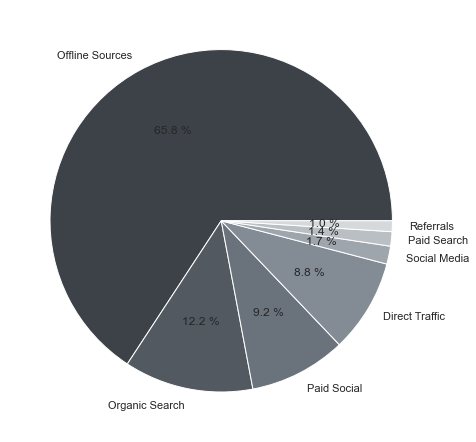

In [56]:
x1 = groupby_source_from[0]
x2 = groupby_source_from[1]
x3 = groupby_source_from[2]
x4 = groupby_source_from[3]
x5 = groupby_source_from[4]
x6 = groupby_source_from[5]
x7 = groupby_source_from[6]

label_name = groupby_source_from.index

labels = [label_name[0], label_name[1], label_name[2], label_name[3], label_name[4], label_name[5], label_name[6]]

piechart_figure_6labels(x1 = x1, x2 = x2, x3 = x3, x4 = x4, x5 = x5, x6 = x6, x7 = x7, labels = labels, rooth_path = rooth_path, name_fig="\\origen_conversion_fase5.png")

## ¿Los que cierran venta vienen con un plan diseñado o de Ikea?

In [57]:
negocios5.head()

,Deal Stage,Received document,Closed Won Reason,Last Modified Date,Motivo descarte,Close Date,Original Source Type,Forecast Amount,Create Date,Deal owner,Amount,Month_closed,Month_open
0,Closed deal (#5),Design plan,NaN,2021-05-04 11:54,NaN,2021-05-04 11:53:00,Offline Sources,65547.0,2021-02-03 11:53:00,Cristina Caeiro Barreiro,65547.0,5.0,2
1,Closed deal (#5),IKEA planner,Pago anticipado 50%,2021-05-04 11:01,NaN,2021-05-04 11:01:00,Paid Search,1600.0,2021-04-09 15:32:00,ALEXANDRE LIZARBE,1600.0,5.0,4
9,Closed deal (#5),Design plan,NaN,2021-04-30 17:20,NaN,2021-04-29 17:19:00,Offline Sources,7400.0,2021-03-26 10:34:00,Alicia Lechuga Amaro,7400.0,4.0,3
10,Closed deal (#5),Design plan,10069,2021-04-29 12:24,NaN,2021-04-29 12:24:00,Offline Sources,49452.0,2021-02-08 14:34:00,Cristina Caeiro Barreiro,49452.0,4.0,2
12,Closed deal (#5),Design plan,NaN,2021-04-30 17:15,NaN,2021-04-28 17:15:00,Offline Sources,14500.0,2021-04-30 17:14:00,Alicia Lechuga Amaro,14500.0,4.0,4


In [58]:
# Cuento cuantas veces se repiten las variables
groupby_document = negocios5['Received document'].value_counts()
groupby_document

Design plan     27
IKEA planner    24
Name: Received document, dtype: int64

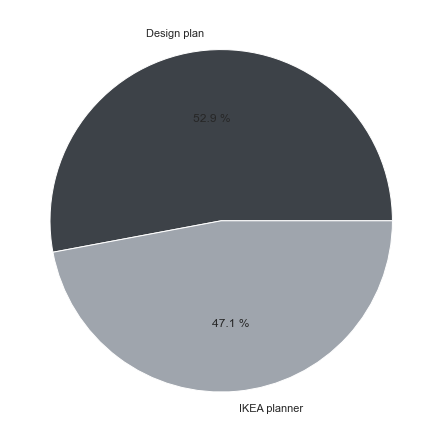

In [59]:
Plan_1 = groupby_document[0]
Plan_2 = groupby_document[1]

labels = [groupby_document.index[0], groupby_document.index[1]]

piechart_figure_6labels(x1 = Plan_1, x2 = Plan_2, labels = labels, rooth_path = rooth_path, name_fig="\\plan_diseñado.png")